# Asian option MC method

In [1]:
import numpy as np

def asian_option_mc(S0, K, r, sigma, T, M, N, seed = None):
    # S0: 초기 주가
    # K: 행사가격
    # r: 무위험 이자율
    # sigma: 변동성
    # T: 만기
    # M: 시뮬레이션 횟수
    # N: 시간 단계 수

    dt = T / N  # 시간 간격
    payoffs = []

    for _ in range(M):
        # 주식 가격 경로 생성
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            Z = np.random.normal(0, 1)  # 표준 정규분포에서 난수 생성
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # 평균 가격 계산
        average_price = np.mean(S)

        # 아시안 콜 옵션의 페이오프
        payoff = max(average_price - K, 0)
        payoffs.append(payoff)

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs,ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval

# 예시 파라미터
S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05      # 무위험 이자율
sigma = 0.3   # 변동성
T = 1      # 만기 (1년)
M = 100000     # 시뮬레이션 횟수
N = 252       # 시간 단계 수 (하루 단위로 252일)
# 아시안 옵션 가격 및 신뢰구간 계산
option_price, confidence_interval = asian_option_mc(S0, K, r, sigma, T, M, N)
print(f"Asian Option Price: {option_price:.2f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
print(confidence_interval[1]-confidence_interval[0])

Asian Option Price: 0.09
95% Confidence Interval: [0.0922, 0.0960]
0.003816229673742094


# Antithetic Variates

In [18]:
# import numpy as np

# def asian_option_mc_antithetic(S0, K, r, sigma, T, M, N):

#     dt = T / N  # 시간 간격
#     payoffs = []

#     for _ in range(M):
#         # 정규 난수 생성 및 반대값 사용
#         Z = np.random.normal(0, 1, N-1)
#         Z_antithetic = -Z

#         # 주식 가격 경로 생성 (원본 경로)
#         S1 = np.zeros(N)
#         S1[0] = S0
#         for t in range(1, N):
#             S1[t] = S1[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

#         # 주식 가격 경로 생성 (반대 경로)
#         S2 = np.zeros(N)
#         S2[0] = S0
#         for t in range(1, N):
#             S2[t] = S2[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_antithetic[t-1])

#         # 평균 가격 계산
#         average_price_1 = np.mean(S1)
#         average_price_2 = np.mean(S2)

#         # 아시안 콜 옵션의 페이오프
#         payoff_1 = max(average_price_1 - K, 0)
#         payoff_2 = max(average_price_2 - K, 0)

#         # 두 페이오프의 평균을 사용
#         payoffs.append(0.5 * (payoff_1 + payoff_2))

#     # 옵션 가격 계산 (할인된 평균 페이오프)
#     discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
#     option_price = np.mean(discounted_payoffs)

#     # 표준 오차와 95% 신뢰구간 계산
#     std_error = np.std(discounted_payoffs) / np.sqrt(M)
#     confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

#     return option_price, confidence_interval

# # 예시 파라미터
# S0 = 5       # 초기 주식 가격
# K = 6        # 행사가격
# r = 0.05     # 무위험 이자율
# sigma = 0.3  # 변동성 (양수여야 함)
# T = 1        # 만기 (1년)
# M = 10000     # 시뮬레이션 횟수
# N = 252      # 시간 단계 수 (하루 단위로 252일)

# # 아시안 옵션 가격 및 신뢰구간 계산
# option_price, confidence_interval = asian_option_mc_antithetic(S0, K, r, sigma, T, M, N)
# print(f"Asian Option Price: {option_price:.4f}")
# print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")


In [19]:
import numpy as np

def asian_option_mc_antithetic(S0, K, r, sigma, T, M, N):
    dt = T / N  # 시간 간격
    payoffs = []

    for _ in range(M):
        # 주식 가격 경로 초기화
        S1 = np.zeros(N)
        S2 = np.zeros(N)
        S1[0] = S0
        S2[0] = S0

        # 시간 단계별로 독립적인 난수 생성
        for t in range(1, N):
            Z = np.random.normal(0, 1)  # 독립적인 표준 정규 난수 생성
            Z_antithetic = -Z  # 반대 변수 생성
            
            # 원본 경로와 반대 경로 업데이트
            S1[t] = S1[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
            S2[t] = S2[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_antithetic)

        # 평균 가격 계산
        average_price_1 = np.mean(S1)
        average_price_2 = np.mean(S2)

        # 아시안 콜 옵션의 페이오프
        payoff_1 = max(average_price_1 - K, 0)
        payoff_2 = max(average_price_2 - K, 0)

        # 두 페이오프의 평균을 사용
        payoffs.append(0.5 * (payoff_1 + payoff_2))

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval

# 예시 파라미터
S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성
T = 1        # 만기 (1년)
M = 100000    # 시뮬레이션 횟수
N = 252      # 시간 단계 수 (하루 단위로 252일)

# 아시안 옵션 가격 및 신뢰구간 계산
option_price, confidence_interval = asian_option_mc_antithetic(S0, K, r, sigma, T, M, N)
print(f"Asian Option Price (Antithetic): {option_price:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
print(confidence_interval[1]-confidence_interval[0])

Asian Option Price (Antithetic): 0.0941
95% Confidence Interval: [0.0928, 0.0954]
0.002562764651767191


# Control Variates

In [3]:
import numpy as np
from scipy.stats import norm

def geometric_asian_option(S0, K, r, sigma, T):
    """ 기하 평균 아시안 옵션의 정확한 가격을 계산 """
    # sigma_adj = sigma * np.sqrt((2 * N + 1) / (6 * N))
    # mu_adj = r - 0.5 * sigma**2 + 0.5 * sigma_adj**2

    sigma_adj = sigma * np.sqrt( (N+1)*(2*N + 1)/(6*N**2) )
    mu_adj = ((N+1) * (r - 0.5 * sigma**2))/(2*N) + 0.5 * sigma_adj**2
    d1 = (np.log(S0 / K) + (mu_adj + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    return np.exp(-r * T) * (S0 * np.exp(mu_adj * T) * norm.cdf(d1) - K * norm.cdf(d2))

def asian_option_mc_control_variate(S0, K, r, sigma, T, M, N):
    # S0: 초기 주가
    # K: 행사가격
    # r: 무위험 이자율
    # sigma: 변동성
    # T: 만기
    # M: 시뮬레이션 횟수
    # N: 시간 단계 수

    dt = T / N  # 시간 간격
    payoffs_X = []  # 아시안 옵션의 표준 몬테카를로 결과
    payoffs_Y = []  # 기하 평균 아시안 옵션의 결과 (Control Variate)

    for _ in range(M):
        # 주식 가격 경로 생성
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            Z = np.random.normal(0, 1)
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # 산술 평균과 기하 평균 계산
        arithmetic_avg = np.mean(S)
        geometric_avg = np.exp(np.mean(np.log(S)))

        # 페이오프 계산
        payoff_X = max(arithmetic_avg - K, 0)  # 산술 평균 옵션 페이오프
        payoff_Y = max(geometric_avg - K, 0)  # 기하 평균 옵션 페이오프

        payoffs_X.append(payoff_X)
        payoffs_Y.append(payoff_Y)

    # 기하 평균 아시안 옵션의 기대값
    E_Y = geometric_asian_option(S0, K, r, sigma, T)

    # Control Variate 적용
    payoffs_X = np.array(payoffs_X)
    payoffs_Y = np.array(payoffs_Y)
    control_variate_payoffs = payoffs_X + (E_Y - payoffs_Y)

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * control_variate_payoffs
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs,ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval

S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성 (양수여야 함)
T = 1        # 만기 (1년)
M = 10000     # 시뮬레이션 횟수
N = 252      # 시간 단계 수 (하루 단위로 252일)

# 옵션 가격 및 신뢰구간 계산
option_price, confidence_interval = asian_option_mc_control_variate(S0, K, r, sigma, T, M, N)
print(f"Asian Option Price with Control Variate: {option_price:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
print(confidence_interval[1]-confidence_interval[0])

Asian Option Price with Control Variate: 0.0923
95% Confidence Interval: [0.0915, 0.0931]
0.0015287605167552398


# 그림

## 계산

In [66]:
import numpy as np
import pandas as pd

def asian_option_mc(S0, K, r, sigma, T, M, N):
    dt = T / N  # 시간 간격
    payoffs = []

    for _ in range(M):
        # 주식 가격 경로 생성
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            Z = np.random.normal(0, 1)  # 표준 정규분포에서 난수 생성
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # 평균 가격 계산
        average_price = np.mean(S)

        # 아시안 콜 옵션의 페이오프
        payoff = max(average_price - K, 0)
        payoffs.append(payoff)

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval, std_error

# 파라미터 설정
S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성
T = 1        # 만기 (1년)
N = 252      # 시간 단계 수
true_value = 0.93  # True 값으로 설정된 옵션 가격

# M 값을 100부터 10,000까지 10개로 설정
M_values = np.linspace(100, 10000, 10, dtype=int)

# 결과 저장을 위한 리스트
results = []

# M 값을 변화시키며 시뮬레이션 실행
for M in M_values:
    option_price, confidence_interval, std_error = asian_option_mc(S0, K, r, sigma, T, M, N)
    error = abs(option_price - true_value)  # True 값과의 절대 오차
    results.append({
        "M": M,
        "Option Price": option_price,
        "95% CI Lower": confidence_interval[0],
        "95% CI Upper": confidence_interval[1],
        "Standard Error": std_error,
        "True Error": error
    })

# 결과를 데이터프레임으로 출력
df_results = pd.DataFrame(results)
print(df_results)

# 결과를 보기 좋게 출력
print("\nSimulation Results:")
print(df_results.to_string(index=False))


       M  Option Price  95% CI Lower  95% CI Upper  Standard Error  True Error
0    100      0.104526      0.047512      0.161541        0.029089    0.825474
1   1200      0.106319      0.087312      0.125327        0.009698    0.823681
2   2300      0.100153      0.087415      0.112891        0.006499    0.829847
3   3400      0.093106      0.082827      0.103385        0.005245    0.836894
4   4500      0.099761      0.089980      0.109543        0.004990    0.830239
5   5600      0.098332      0.090080      0.106585        0.004210    0.831668
6   6700      0.091562      0.084398      0.098727        0.003655    0.838438
7   7800      0.097650      0.090707      0.104593        0.003542    0.832350
8   8900      0.092849      0.086552      0.099146        0.003213    0.837151
9  10000      0.094179      0.088121      0.100238        0.003091    0.835821

Simulation Results:
    M  Option Price  95% CI Lower  95% CI Upper  Standard Error  True Error
  100      0.104526      0.047512 

## original method

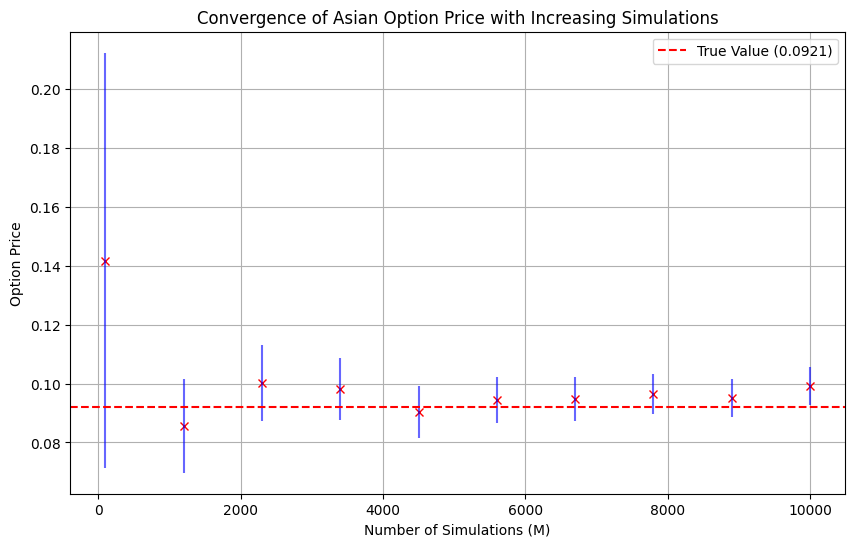

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def asian_option_mc(S0, K, r, sigma, T, M, N):
    dt = T / N  # 시간 간격
    payoffs = []

    for _ in range(M):
        # 주식 가격 경로 생성
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            Z = np.random.normal(0, 1)  # 표준 정규분포에서 난수 생성
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # 평균 가격 계산
        average_price = np.mean(S)

        # 아시안 콜 옵션의 페이오프
        payoff = max(average_price - K, 0)
        payoffs.append(payoff)

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval, std_error

# 파라미터 설정
S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성
T = 1        # 만기 (1년)
N = 252      # 시간 단계 수
true_value = 0.0921  # True 값으로 설정된 옵션 가격

# M 값을 100부터 10,000까지 10개로 설정
M_values = np.linspace(100, 10000, 10, dtype=int)

# 결과 저장을 위한 리스트
option_prices = []
confidence_intervals = []

# M 값을 변화시키며 시뮬레이션 실행
for M in M_values:
    option_price, confidence_interval, _ = asian_option_mc(S0, K, r, sigma, T, M, N)
    option_prices.append(option_price)
    confidence_intervals.append(confidence_interval)

# 결과 시각화
plt.figure(figsize=(10, 6))

# 각 M에 대해 추정값과 신뢰구간을 수직선 형태로 표시
for i, M in enumerate(M_values):
    option_price = option_prices[i]
    confidence_interval = confidence_intervals[i]
    
    # 추정값을 x로 표시
    plt.plot(M, option_price, 'rx')  
    
    # 신뢰구간을 수직선으로 표시
    plt.vlines(M, confidence_interval[0], confidence_interval[1], color='b', alpha=0.6)

# True 값 (0.0921)을 빨간 점선으로 표시
plt.axhline(y=true_value, color='r', linestyle='--', label="True Value (0.0921)")

plt.xlabel("Number of Simulations (M)")
plt.ylabel("Option Price")
plt.title("Convergence of Asian Option Price with Increasing Simulations")
plt.legend()
plt.grid()
plt.show()


## Antithetic Variates

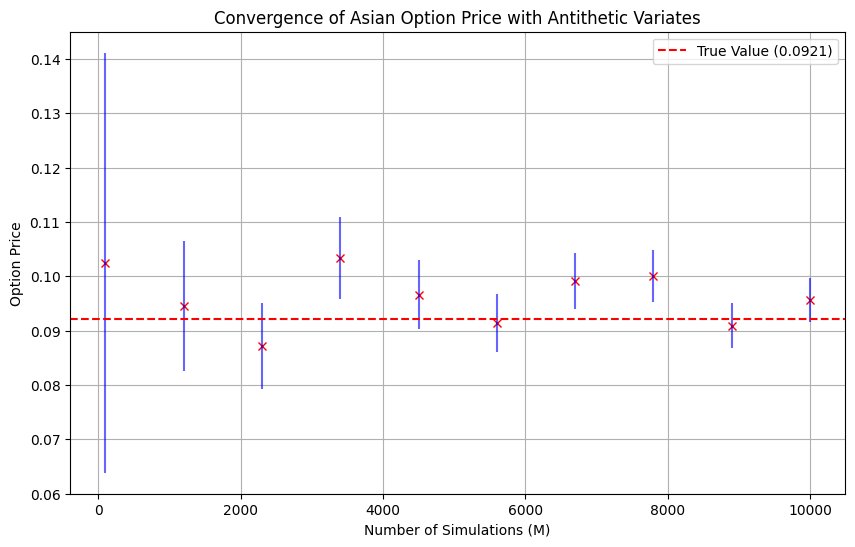

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def asian_option_mc_antithetic(S0, K, r, sigma, T, M, N):
    dt = T / N  # 시간 간격
    payoffs = []

    for _ in range(M):
        # 정규 난수 생성 및 반대값 사용
        Z = np.random.normal(0, 1, N-1)
        Z_antithetic = -Z

        # 주식 가격 경로 생성 (원본 경로)
        S1 = np.zeros(N)
        S1[0] = S0
        for t in range(1, N):
            S1[t] = S1[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z[t-1])

        # 주식 가격 경로 생성 (반대 경로)
        S2 = np.zeros(N)
        S2[0] = S0
        for t in range(1, N):
            S2[t] = S2[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_antithetic[t-1])

        # 평균 가격 계산
        average_price_1 = np.mean(S1)
        average_price_2 = np.mean(S2)

        # 아시안 콜 옵션의 페이오프
        payoff_1 = max(average_price_1 - K, 0)
        payoff_2 = max(average_price_2 - K, 0)

        # 두 페이오프의 평균을 사용
        payoffs.append(0.5 * (payoff_1 + payoff_2))

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval, std_error

# 파라미터 설정
S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성
T = 1        # 만기 (1년)
N = 252      # 시간 단계 수
true_value = 0.0921  # True 값으로 설정된 옵션 가격

# M 값을 100부터 10,000까지 10개로 설정
M_values = np.linspace(100, 10000, 10, dtype=int)

# 결과 저장을 위한 리스트
option_prices = []
confidence_intervals = []

# M 값을 변화시키며 시뮬레이션 실행
for M in M_values:
    option_price, confidence_interval, _ = asian_option_mc_antithetic(S0, K, r, sigma, T, M, N)
    option_prices.append(option_price)
    confidence_intervals.append(confidence_interval)

# 결과 시각화
plt.figure(figsize=(10, 6))

# 각 M에 대해 추정값과 신뢰구간을 수직선 형태로 표시
for i, M in enumerate(M_values):
    option_price = option_prices[i]
    confidence_interval = confidence_intervals[i]
    
    # 추정값을 x로 표시
    plt.plot(M, option_price, 'rx')  
    
    # 신뢰구간을 수직선으로 표시
    plt.vlines(M, confidence_interval[0], confidence_interval[1], color='b', alpha=0.6)

# True 값 (0.0937)을 빨간 점선으로 표시
plt.axhline(y=true_value, color='r', linestyle='--', label="True Value (0.0921)")

plt.xlabel("Number of Simulations (M)")
plt.ylabel("Option Price")
plt.title("Convergence of Asian Option Price with Antithetic Variates")
plt.legend()
plt.grid()
plt.show()


# 상관계수

In [41]:
# Adjusted parameters for faster computation
M = 10000   # Reduced number of simulations
N = 100     # Reduced number of time steps
import numpy as np
# 파라미터 설정
S0 = 5       # 초기 주식 가격
K = 6       # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성
T = 1        # 만기 (1년)
      # 시간 단계 수
true_value = 0.0937  # True 값으로 설정된 옵션 가격

dt = T / N  # Adjusted time step

# Reinitialize payoffs
payoffs_X = []
payoffs_Y = []

# Simulation loop with adjusted parameters
for _ in range(M):
    # Generate stock price path
    S = np.zeros(N)
    S[0] = S0
    for t in range(1, N):
        Z = np.random.normal(0, 1)
        S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Calculate arithmetic and geometric averages
    arithmetic_avg = np.mean(S)
    geometric_avg = np.exp(np.mean(np.log(S)))

    # Calculate payoffs
    payoff_X = max(arithmetic_avg - K, 0)  # 산술 평균 옵션 페이오프
    payoff_Y = max(geometric_avg - K, 0)  # 기하 평균 옵션 페이오프

    payoffs_X.append(payoff_X)
    payoffs_Y.append(payoff_Y)

# Convert to numpy arrays
payoffs_X = np.array(payoffs_X)
payoffs_Y = np.array(payoffs_Y)

# Calculate correlation coefficient
correlation = np.corrcoef(payoffs_X, payoffs_Y)[0, 1]
correlation


0.9972965304241138

In [30]:
import numpy as np
from scipy.stats import norm

def geometric_asian_option(S0, K, r, sigma, T, N):
    """ 기하 평균 아시안 옵션의 정확한 가격을 계산 """
    sigma_adj = sigma * np.sqrt((N + 1) * (2 * N + 1) / (6 * N**2))
    mu_adj = ((N + 1) * (r - 0.5 * sigma**2)) / (2 * N) + 0.5 * sigma_adj**2
    d1 = (np.log(S0 / K) + (mu_adj + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    return np.exp(-r * T) * (S0 * np.exp(mu_adj * T) * norm.cdf(d1) - K * norm.cdf(d2))

def asian_option_mc_control_variate(S0, K, r, sigma, T, M, N):
    # S0: 초기 주가
    # K: 행사가격
    # r: 무위험 이자율
    # sigma: 변동성
    # T: 만기
    # M: 시뮬레이션 횟수
    # N: 시간 단계 수

    dt = T / N  # 시간 간격
    payoffs_X = []  # 아시안 옵션의 표준 몬테카를로 결과
    payoffs_Y = []  # 기하 평균 아시안 옵션의 결과 (Control Variate)

    for _ in range(M):
        # 주식 가격 경로 생성
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            Z = np.random.normal(0, 1)
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # 산술 평균과 기하 평균 계산
        arithmetic_avg = np.mean(S)
        geometric_avg = np.exp(np.mean(np.log(S)))

        # 페이오프 계산
        payoff_X = max(arithmetic_avg - K, 0)  # 산술 평균 옵션 페이오프
        payoff_Y = max(geometric_avg - K, 0)  # 기하 평균 옵션 페이오프

        payoffs_X.append(payoff_X)
        payoffs_Y.append(payoff_Y)

    # 기하 평균 아시안 옵션의 기대값
    E_Y = geometric_asian_option(S0, K, r, sigma, T, N)

    # Control Variate 적용
    payoffs_X = np.array(payoffs_X)
    payoffs_Y = np.array(payoffs_Y)
    control_variate_payoffs = payoffs_X + (E_Y - payoffs_Y)

    # 공분산 계산
    covariance = np.cov(payoffs_X, payoffs_Y)[0, 1]

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * control_variate_payoffs
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval, covariance

S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성 (양수여야 함)
T = 1        # 만기 (1년)
M = 100000   # 시뮬레이션 횟수
N = 252      # 시간 단계 수 (하루 단위로 252일)

# 옵션 가격 및 신뢰구간 계산
option_price, confidence_interval, covariance = asian_option_mc_control_variate(S0, K, r, sigma, T, M, N)
print(f"Asian Option Price with Control Variate: {option_price:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
print(f"Covariance between Payoffs (Arithmetic vs Geometric): {covariance:.4f}")


Asian Option Price with Control Variate: 0.0920
95% Confidence Interval: [0.0917, 0.0922]
Covariance between Payoffs (Arithmetic vs Geometric): 0.0940


In [31]:
import numpy as np
from scipy.stats import norm

def geometric_asian_option(S0, K, r, sigma, T, N):
    """ 기하 평균 아시안 옵션의 정확한 가격을 계산 """
    sigma_adj = sigma * np.sqrt((N + 1) * (2 * N + 1) / (6 * N**2))
    mu_adj = ((N + 1) * (r - 0.5 * sigma**2)) / (2 * N) + 0.5 * sigma_adj**2
    d1 = (np.log(S0 / K) + (mu_adj + 0.5 * sigma_adj**2) * T) / (sigma_adj * np.sqrt(T))
    d2 = d1 - sigma_adj * np.sqrt(T)
    return np.exp(-r * T) * (S0 * np.exp(mu_adj * T) * norm.cdf(d1) - K * norm.cdf(d2))

def asian_option_mc_control_variate(S0, K, r, sigma, T, M, N):
    # S0: 초기 주가
    # K: 행사가격
    # r: 무위험 이자율
    # sigma: 변동성
    # T: 만기
    # M: 시뮬레이션 횟수
    # N: 시간 단계 수

    dt = T / N  # 시간 간격
    payoffs_X = []  # 아시안 옵션의 표준 몬테카를로 결과
    payoffs_Y = []  # 기하 평균 아시안 옵션의 결과 (Control Variate)

    for _ in range(M):
        # 주식 가격 경로 생성
        S = np.zeros(N)
        S[0] = S0
        for t in range(1, N):
            Z = np.random.normal(0, 1)
            S[t] = S[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

        # 산술 평균과 기하 평균 계산
        arithmetic_avg = np.mean(S)
        geometric_avg = np.exp(np.mean(np.log(S)))

        # 페이오프 계산
        payoff_X = max(arithmetic_avg - K, 0)  # 산술 평균 옵션 페이오프
        payoff_Y = max(geometric_avg - K, 0)  # 기하 평균 옵션 페이오프

        payoffs_X.append(payoff_X)
        payoffs_Y.append(payoff_Y)

    # 기하 평균 아시안 옵션의 기대값
    E_Y = geometric_asian_option(S0, K, r, sigma, T, N)

    # Control Variate 적용
    payoffs_X = np.array(payoffs_X)
    payoffs_Y = np.array(payoffs_Y)
    control_variate_payoffs = payoffs_X + (E_Y - payoffs_Y)

    # 공분산 계산
    covariance = np.cov(payoffs_X, payoffs_Y)[0, 1]

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * control_variate_payoffs
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    # 분산 계산
    variance_X = np.var(payoffs_X)
    variance_Y = np.var(payoffs_Y)
    variance_control_variate = np.var(control_variate_payoffs)

    return option_price, confidence_interval, covariance, variance_X, variance_Y, variance_control_variate

S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성 (양수여야 함)
T = 1        # 만기 (1년)
M = 100000   # 시뮬레이션 횟수
N = 252      # 시간 단계 수 (하루 단위로 252일)

# 옵션 가격 및 신뢰구간 계산
option_price, confidence_interval, covariance, variance_X, variance_Y, variance_control_variate = asian_option_mc_control_variate(S0, K, r, sigma, T, M, N)
print(f"Asian Option Price with Control Variate: {option_price:.4f}")
print(f"95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]")
print(f"Covariance between Payoffs (Arithmetic vs Geometric): {covariance:.4f}")
print(f"Variance of Payoffs (Arithmetic): {variance_X:.4f}")
print(f"Variance of Payoffs (Geometric): {variance_Y:.4f}")
print(f"Variance of Control Variate Payoffs: {variance_control_variate:.4f}")


Asian Option Price with Control Variate: 0.0920
95% Confidence Interval: [0.0917, 0.0922]
Covariance between Payoffs (Arithmetic vs Geometric): 0.0934
Variance of Payoffs (Arithmetic): 0.1047
Variance of Payoffs (Geometric): 0.0837
Variance of Control Variate Payoffs: 0.0016


In [35]:
0.0934/(np.sqrt(0.1047*0.0837))

0.9977248895447594

In [36]:
0.0934/0.0837

1.1158900836320191

# antithetic 그림

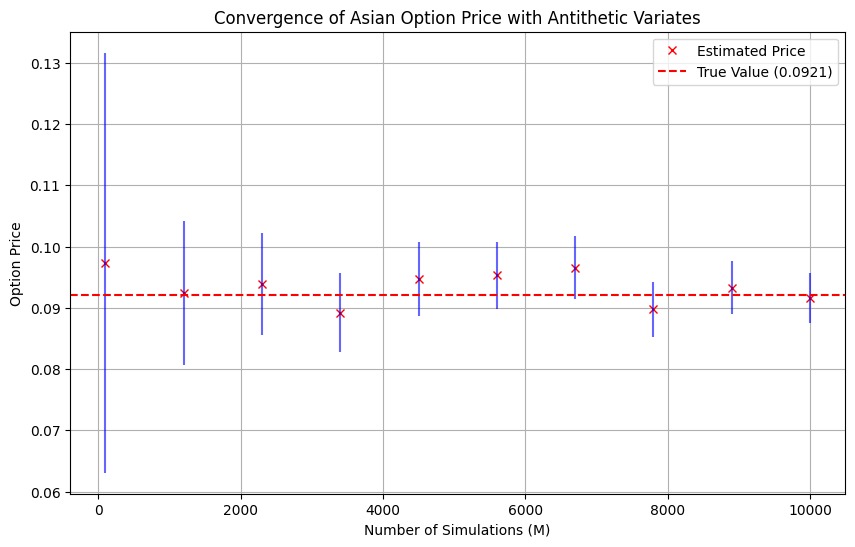

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def asian_option_mc_antithetic(S0, K, r, sigma, T, M, N):
    dt = T / N  # 시간 간격
    payoffs = []

    for _ in range(M):
        # 주식 가격 경로 초기화
        S1 = np.zeros(N)
        S2 = np.zeros(N)
        S1[0] = S0
        S2[0] = S0

        # 시간 단계별로 독립적인 난수 생성
        for t in range(1, N):
            Z = np.random.normal(0, 1)  # 독립적인 표준 정규 난수 생성
            Z_antithetic = -Z  # 반대 변수 생성
            
            # 원본 경로와 반대 경로 업데이트
            S1[t] = S1[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
            S2[t] = S2[t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z_antithetic)

        # 평균 가격 계산
        average_price_1 = np.mean(S1)
        average_price_2 = np.mean(S2)

        # 아시안 콜 옵션의 페이오프
        payoff_1 = max(average_price_1 - K, 0)
        payoff_2 = max(average_price_2 - K, 0)

        # 두 페이오프의 평균을 사용
        payoffs.append(0.5 * (payoff_1 + payoff_2))

    # 옵션 가격 계산 (할인된 평균 페이오프)
    discounted_payoffs = np.exp(-r * T) * np.array(payoffs)
    option_price = np.mean(discounted_payoffs)

    # 표준 오차와 95% 신뢰구간 계산
    std_error = np.std(discounted_payoffs, ddof=1) / np.sqrt(M)
    confidence_interval = (option_price - 1.96 * std_error, option_price + 1.96 * std_error)

    return option_price, confidence_interval

# 파라미터 설정
S0 = 5       # 초기 주식 가격
K = 6        # 행사가격
r = 0.05     # 무위험 이자율
sigma = 0.3  # 변동성
T = 1        # 만기 (1년)
N = 252      # 시간 단계 수
true_value = 0.0921  # True 값으로 설정된 옵션 가격

# M 값을 100부터 10,000까지 10개로 설정
M_values = np.linspace(100, 10000, 10, dtype=int)

# 결과 저장을 위한 리스트
option_prices = []
confidence_intervals = []

# M 값을 변화시키며 시뮬레이션 실행
for M in M_values:
    option_price, confidence_interval = asian_option_mc_antithetic(S0, K, r, sigma, T, M, N)
    option_prices.append(option_price)
    confidence_intervals.append(confidence_interval)

# 결과 시각화
plt.figure(figsize=(10, 6))

# 각 M에 대해 추정값과 신뢰구간을 수직선 형태로 표시
for i, M in enumerate(M_values):
    option_price = option_prices[i]
    confidence_interval = confidence_intervals[i]
    
    # 추정값을 x로 표시
    plt.plot(M, option_price, 'rx', label="Estimated Price" if i == 0 else "")  
    
    # 신뢰구간을 수직선으로 표시
    plt.vlines(M, confidence_interval[0], confidence_interval[1], color='b', alpha=0.6)

# True 값 (0.0921)을 빨간 점선으로 표시
plt.axhline(y=true_value, color='r', linestyle='--', label="True Value (0.0921)")

plt.xlabel("Number of Simulations (M)")
plt.ylabel("Option Price")
plt.title("Convergence of Asian Option Price with Antithetic Variates")
plt.legend()
plt.grid()
plt.show()
